In [164]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
import pandas as pd
import os
import json
import ast
import matplotlib.pyplot as plt

# Download Data From Google Sheets

In [165]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
SPREADSHEET_ID = '1dGWPonH4gSo4QsgBGjECiBvwnTA52zfXs43QcYC3c30'
RANGE = 'DW_DS_takehome_dataset' 

In [166]:
out_csv = "dw-ds-takehome-dataset.csv"
if not os.path.exists(out_csv):
    download_data = True
else:
    download_data = False

In [167]:
if download_data:
    flow = InstalledAppFlow.from_client_secrets_file(f'{os.getcwd()}/creds.json', SCOPES)
    creds = flow.run_local_server(port=0)

In [168]:
if download_data:
    service = build('sheets', 'v4', credentials=creds)
    sheet = service.spreadsheets()

    result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE).execute()
    values = result.get('values', [])

    if not values:
        print("No data found.")

    # If first row is header:
    df = pd.DataFrame(values[1:], columns=values[0])

    # Save CSV
    out_csv = "dw-ds-takehome-dataset.csv"
    df.to_csv(out_csv, index=False)
    print(f"Saved to {out_csv}")
    print(df.head())

In [169]:
if not download_data:
    print("Downloading data...")
    df = pd.read_csv(out_csv)

In [170]:
df.head()

,USER_ID,USER_CREATED_TS,FIRST_SUBSCRIPTION_TS,N_TEAM_ASSOCIATIONS,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE
0,1,07:34.0,12:20.9,16,"[\n ""Between 13 - 18"",\n ""Under 13""\n]","[\n ""school"",\n ""club_travel"",\n ""recreatio...","[\n ""family"",\n ""fan"",\n ""manager""\n]","[\n ""baseball""\n]",350,236,1.0,5.0,1124.0
1,2,10:37.7,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,49.0
2,3,16:03.1,NaN,2,"[\n ""Between 13 - 18""\n]","[\n ""club_travel""\n]","[\n ""fan"",\n ""family""\n]","[\n ""softball""\n]",1,0,NaN,NaN,374.0
3,4,18:06.0,22:26.0,235,"[\n ""Under 13"",\n ""Between 13 - 18""\n]","[\n ""club_travel"",\n ""recreational"",\n ""sch...","[\n ""family"",\n ""manager"",\n ""fan""\n]","[\n ""baseball"",\n ""soccer""\n]",7312,2299,41.0,0.0,1010.0
4,5,29:55.7,NaN,11,"[\n ""Under 13""\n]","[\n ""club_travel""\n]","[\n ""family"",\n ""fan"",\n ""admin""\n]","[\n ""baseball"",\n ""softball""\n]",125,0,NaN,NaN,658.0


| Column Name                | Description                                                                                                   | Type      |
|----------------------------|---------------------------------------------------------------------------------------------------------------|-----------|
| user_id                    | Unique id for a user                                                                                          | integer   |
| user_created_ts            | The timestamp when the user created their Sports Streamer account.                                            | timestamp |
| first_subscription_ts      | The timestamp when the user first started a paid subscription with Sports Streamer. NULL if never subscribed. | timestamp |
| n_team_associations        | The number of teams the user is associated with (admin/manager, family member, fan, or player).               | integer   |
| team_age_groups            | The distinct age groups for the team(s) that the user is associated with (e.g., Under 13).                    | array     |
| team_competiton_levels     | The distinct competition levels for the team(s) that the user is associated with (e.g., club_travel).         | array     |
| team_roles                 | The distinct roles that a user has on their associated teams (e.g., family).                                  | array     |
| team_sports                | The distinct sports that the user’s associated team(s) are for (e.g., basketball).                            | array     |
| n_team_games_scored        | The total number of games that were scored for the teams the user is associated with.                         | integer   |
| n_team_games_streamed      | The total number of games that were livestreamed for the teams the user is associated with.                   | integer   |
| n_games_scored_by_user     | The total number of games that the user scored for the teams the user is associated with.                     | integer   |
| n_games_streamed_by_user   | The total number of games that the user livestreamed for the teams the user is associated with.                | integer   |
| n_days_user_active         | The total number of days a user has logged into our app                                                       | integer   |

In [171]:
df.dtypes

USER_ID                       int64
USER_CREATED_TS              object
FIRST_SUBSCRIPTION_TS        object
N_TEAM_ASSOCIATIONS           int64
TEAM_AGE_GROUPS              object
TEAM_COMPETITION_LEVELS      object
TEAM_ROLES                   object
TEAM_SPORTS                  object
N_TEAM_GAMES_SCORED           int64
N_TEAM_VIDEOS_STREAMED        int64
N_GAMES_SCORED_BY_USER      float64
N_GAMES_STREAMED_BY_USER    float64
N_DAYS_USER_ACTIVE          float64
dtype: object

# Clean up Types

In [172]:
df['USER_ID'] = df['USER_ID'].astype(str)

In [173]:
# Convert int64 columns to float64
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].astype('float64')


In [174]:
def convert_to_list(x):
    if pd.notnull(x):
        return ast.literal_eval(x)
    else:
        return x

In [175]:
# Convert the list column from string to list
df['TEAM_AGE_GROUPS'] = df['TEAM_AGE_GROUPS'].apply(convert_to_list)
df['TEAM_COMPETITION_LEVELS'] = df['TEAM_COMPETITION_LEVELS'].apply(convert_to_list)
df['TEAM_ROLES'] = df['TEAM_ROLES'].apply(convert_to_list)
df['TEAM_SPORTS'] = df['TEAM_SPORTS'].apply(convert_to_list)
df.head()

,USER_ID,USER_CREATED_TS,FIRST_SUBSCRIPTION_TS,N_TEAM_ASSOCIATIONS,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE
0,1,07:34.0,12:20.9,16.0,"[Between 13 - 18, Under 13]","[school, club_travel, recreational]","[family, fan, manager]",[baseball],350.0,236.0,1.0,5.0,1124.0
1,2,10:37.7,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,49.0
2,3,16:03.1,NaN,2.0,[Between 13 - 18],[club_travel],"[fan, family]",[softball],1.0,0.0,NaN,NaN,374.0
3,4,18:06.0,22:26.0,235.0,"[Under 13, Between 13 - 18]","[club_travel, recreational, school]","[family, manager, fan]","[baseball, soccer]",7312.0,2299.0,41.0,0.0,1010.0
4,5,29:55.7,NaN,11.0,[Under 13],[club_travel],"[family, fan, admin]","[baseball, softball]",125.0,0.0,NaN,NaN,658.0


In [176]:
def extract_hour(t):
    if pd.notnull(t):
        return int(t.split(':')[0])
    else:
        return None

df['USER_CREATED_HOUR'] = df['USER_CREATED_TS'].apply(extract_hour)
df['FIRST_SUBSCRIPTION_HOUR'] = df['FIRST_SUBSCRIPTION_TS'].apply(extract_hour)
df.head()

,USER_ID,USER_CREATED_TS,FIRST_SUBSCRIPTION_TS,N_TEAM_ASSOCIATIONS,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,USER_CREATED_HOUR,FIRST_SUBSCRIPTION_HOUR
0,1,07:34.0,12:20.9,16.0,"[Between 13 - 18, Under 13]","[school, club_travel, recreational]","[family, fan, manager]",[baseball],350.0,236.0,1.0,5.0,1124.0,7,12.0
1,2,10:37.7,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,49.0,10,NaN
2,3,16:03.1,NaN,2.0,[Between 13 - 18],[club_travel],"[fan, family]",[softball],1.0,0.0,NaN,NaN,374.0,16,NaN
3,4,18:06.0,22:26.0,235.0,"[Under 13, Between 13 - 18]","[club_travel, recreational, school]","[family, manager, fan]","[baseball, soccer]",7312.0,2299.0,41.0,0.0,1010.0,18,22.0
4,5,29:55.7,NaN,11.0,[Under 13],[club_travel],"[family, fan, admin]","[baseball, softball]",125.0,0.0,NaN,NaN,658.0,29,NaN


In [177]:
just_subs = df[df['FIRST_SUBSCRIPTION_TS'].notna()]
(just_subs['USER_CREATED_HOUR'] < just_subs['FIRST_SUBSCRIPTION_HOUR']).mean()

np.float64(0.5113998107201239)

Based on the above it is not ok to assume the date of created and the date of subscription are the same day.

In [178]:
df.describe()

,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,USER_CREATED_HOUR,FIRST_SUBSCRIPTION_HOUR
count,500000.000000,500000.000000,500000.000000,70785.000000,70785.000000,499052.000000,500000.000000,81361.000000
mean,5.859258,98.586810,39.517860,14.186042,4.033171,185.415077,29.406536,29.316982
std,13.665193,320.162932,174.814579,37.578511,15.527853,229.290498,17.305827,17.573261
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,14.000000,14.000000
50%,3.000000,31.000000,0.000000,2.000000,0.000000,96.000000,29.000000,30.000000
75%,6.000000,97.000000,28.000000,11.000000,1.000000,251.000000,44.000000,44.000000
max,1492.000000,34722.000000,23942.000000,2641.000000,462.000000,1663.000000,59.000000,59.000000


The timestamp is useless but only to show subs or not.
Not the error seen above.  (Timestamp is only minute:second.)

In [179]:
df['USER_SUBSCRIPTION_STATUS'] = df['FIRST_SUBSCRIPTION_TS'].notna().astype(int)
df['USER_SUBSCRIPTION_STATUS'].describe()

count    500000.000000
mean          0.162722
std           0.369112
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: USER_SUBSCRIPTION_STATUS, dtype: float64

In [180]:
df.drop(columns=['USER_CREATED_TS', 'FIRST_SUBSCRIPTION_TS', 'USER_CREATED_HOUR', 'FIRST_SUBSCRIPTION_HOUR'], inplace=True)
df.head()

,USER_ID,N_TEAM_ASSOCIATIONS,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,USER_SUBSCRIPTION_STATUS
0,1,16.0,"[Between 13 - 18, Under 13]","[school, club_travel, recreational]","[family, fan, manager]",[baseball],350.0,236.0,1.0,5.0,1124.0,1
1,2,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,49.0,0
2,3,2.0,[Between 13 - 18],[club_travel],"[fan, family]",[softball],1.0,0.0,NaN,NaN,374.0,0
3,4,235.0,"[Under 13, Between 13 - 18]","[club_travel, recreational, school]","[family, manager, fan]","[baseball, soccer]",7312.0,2299.0,41.0,0.0,1010.0,1
4,5,11.0,[Under 13],[club_travel],"[family, fan, admin]","[baseball, softball]",125.0,0.0,NaN,NaN,658.0,0


# Understand Missing Data

In [181]:
def is_zero_or_missing(col):
    """
    Returns a Series: 1 if value is 0 or missing (NaN), 0 otherwise.
    """
    if col == 'missing' or col == 0:
        return 1
    else:
        return 0

In [182]:
df.fillna('missing', inplace=True)

/var/folders/zr/qsxxq3v54b59qhrjqcmkz35m0000gn/T/ipykernel_49725/698145088.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('missing', inplace=True)


In [183]:
check_zero_or_missing_cols = ['N_TEAM_ASSOCIATIONS', 'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED', 'N_GAMES_SCORED_BY_USER',
 'N_GAMES_STREAMED_BY_USER', 'N_DAYS_USER_ACTIVE', 'TEAM_AGE_GROUPS', 'TEAM_COMPETITION_LEVELS', 'TEAM_ROLES', 'TEAM_SPORTS']

for col in check_zero_or_missing_cols:
    df[f'{col}_ZERO_OR_MISSING'] = df[col].apply(is_zero_or_missing)
df.describe()

,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS_ZERO_OR_MISSING,N_TEAM_GAMES_SCORED_ZERO_OR_MISSING,N_TEAM_VIDEOS_STREAMED_ZERO_OR_MISSING,N_GAMES_SCORED_BY_USER_ZERO_OR_MISSING,N_GAMES_STREAMED_BY_USER_ZERO_OR_MISSING,N_DAYS_USER_ACTIVE_ZERO_OR_MISSING,TEAM_AGE_GROUPS_ZERO_OR_MISSING,TEAM_COMPETITION_LEVELS_ZERO_OR_MISSING,TEAM_ROLES_ZERO_OR_MISSING,TEAM_SPORTS_ZERO_OR_MISSING
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,5.859258,98.586810,39.517860,0.162722,0.117386,0.242996,0.557608,0.899794,0.933780,0.001896,0.117386,0.117386,0.117386,0.117386
std,13.665193,320.162932,174.814579,0.369112,0.321880,0.428893,0.496671,0.300275,0.248667,0.043502,0.321880,0.321880,0.321880,0.321880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,97.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1492.000000,34722.000000,23942.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
def correlation_matrix(df, col_suffix):
    # Select columns ending with 'ZERO_OR_MISSING'
    cols = [col for col in df.columns if col.endswith(col_suffix)]

    # Compute correlation matrix
    corr_matrix = df[cols].astype(float).corr()

    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.yticks(range(len(cols)), cols)
    plt.title(f'Correlation Matrix of {col_suffix} Columns')
    plt.tight_layout()
    plt.show()

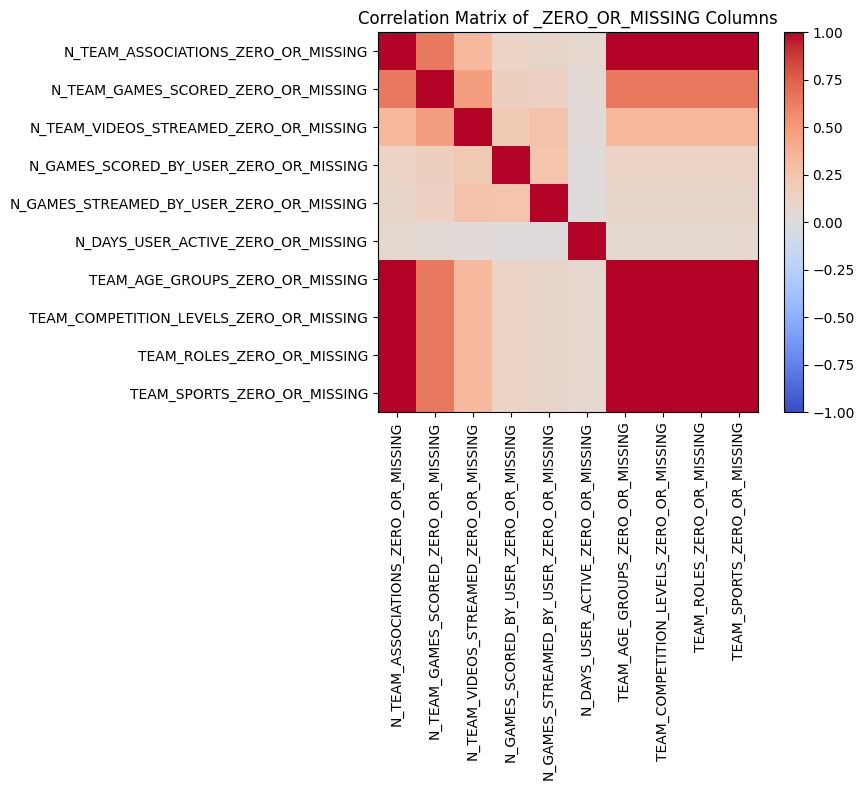

In [185]:
correlation_matrix(df, '_ZERO_OR_MISSING')

The above chart is a gut check.  The columns that are highly correlated 'make sense' as well as those uncorrelated.

In [186]:
lengths_col = ['TEAM_AGE_GROUPS', 'TEAM_COMPETITION_LEVELS', 'TEAM_ROLES', 'TEAM_SPORTS']
for col in lengths_col:
    df[f'{col}_LENGTH'] = df[col].apply(len)
df[lengths_col].describe()

,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS
count,500000,500000,500000,500000
unique,17,17,114,3194
top,[Under 13],[club_travel],[family],[baseball]
freq,187597,115522,164703,234420


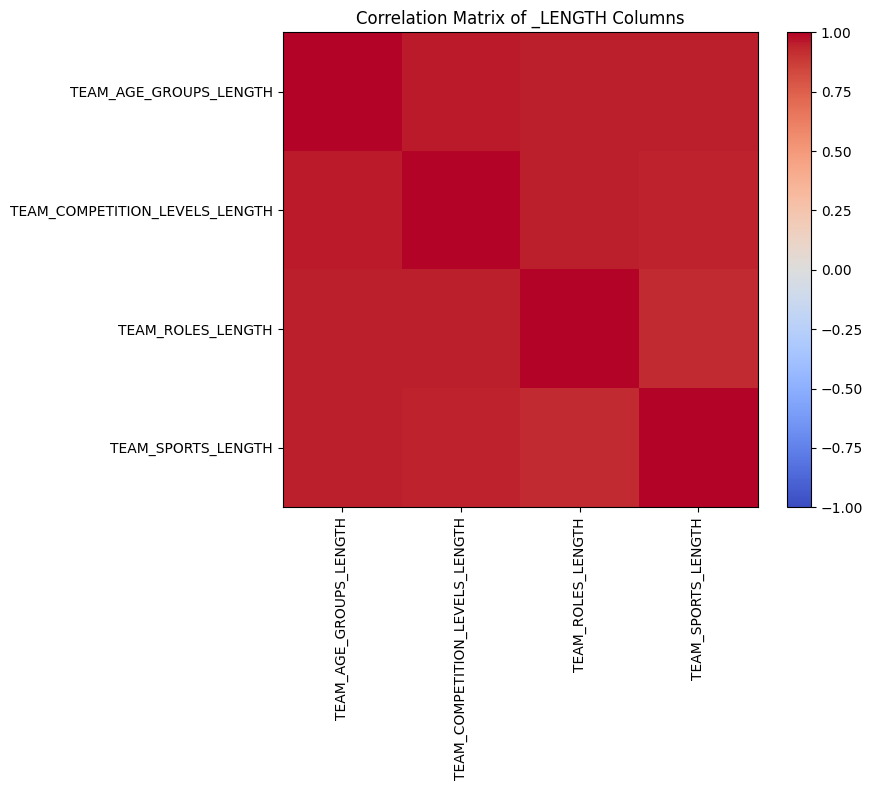

In [187]:
correlation_matrix(df, '_LENGTH')

All of the array columns have the same length. From this I will assume the each item placement in the array is assoicated with the same placement in the other columns.

# Replacing Missing Values

replacing N_DAYS_USER_ACTIVE with 1s b/c it's the min and it is not correlated with other columns

In [188]:
df['N_DAYS_USER_ACTIVE'].value_counts()

N_DAYS_USER_ACTIVE
8.0       47547
16.0      12566
9.0        9063
24.0       5409
17.0       4975
          ...  
1627.0        1
1540.0        1
1586.0        1
1525.0        1
1588.0        1
Name: count, Length: 1599, dtype: int64

In [189]:
df['N_DAYS_USER_ACTIVE'].describe()

count     500000.0
unique      1599.0
top            8.0
freq       47547.0
Name: N_DAYS_USER_ACTIVE, dtype: float64

In [190]:
df['N_DAYS_USER_ACTIVE'] = df['N_DAYS_USER_ACTIVE'].map(lambda x: 1 if x == 'missing' else x)

In [191]:
df['N_DAYS_USER_ACTIVE'].describe()

count    500000.000000
mean        185.065426
std         229.213460
min           1.000000
25%          28.000000
50%          96.000000
75%         251.000000
max        1663.000000
Name: N_DAYS_USER_ACTIVE, dtype: float64

replacing other columns with 0 as it logically makese sense.

In [192]:
replacing_col = ['N_TEAM_ASSOCIATIONS', 'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED', 'N_GAMES_SCORED_BY_USER',
 'N_GAMES_STREAMED_BY_USER']

for col in replacing_col:
    df[col] = df[col].map(lambda x: 0 if x == 'missing' else x)
df[replacing_col].describe()

,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,5.859258,98.586810,39.517860,2.008318,0.570976
std,13.665193,320.162932,174.814579,14.979041,6.009239
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,31.000000,0.000000,0.000000,0.000000
75%,6.000000,97.000000,28.000000,0.000000,0.000000
max,1492.000000,34722.000000,23942.000000,2641.000000,462.000000


In [193]:
for col in lengths_col:
    df[col] = df[col].map(lambda x: [] if x == 'missing' else x)
df[lengths_col].describe()

,TEAM_AGE_GROUPS,TEAM_COMPETITION_LEVELS,TEAM_ROLES,TEAM_SPORTS
count,500000,500000,500000,500000
unique,16,16,114,3193
top,[Under 13],[club_travel],[family],[baseball]
freq,187597,115522,164703,234420


In [194]:
df['TEAM_AGE_GROUPS'].value_counts()

TEAM_AGE_GROUPS
[Under 13]                              187597
[Between 13 - 18]                       107278
[]                                       59073
[Under 13, Between 13 - 18]              57555
[Between 13 - 18, Under 13]              54383
[Over 18]                                12705
[Between 13 - 18, Over 18]                4254
[Over 18, Between 13 - 18]                3136
[Between 13 - 18, Under 13, Over 18]      2729
[Under 13, Between 13 - 18, Over 18]      2348
[Between 13 - 18, Over 18, Under 13]      2022
[Under 13, Over 18]                       1742
[Under 13, Over 18, Between 13 - 18]      1595
[Over 18, Under 13]                       1280
[Over 18, Between 13 - 18, Under 13]      1235
[Over 18, Under 13, Between 13 - 18]      1068
Name: count, dtype: int64

# Save Cleaned Data

In [195]:
df[['USER_ID',
'USER_SUBSCRIPTION_STATUS',
 'N_TEAM_ASSOCIATIONS',
 'TEAM_AGE_GROUPS',
 'TEAM_COMPETITION_LEVELS',
 'TEAM_ROLES',
 'TEAM_SPORTS',
 'N_TEAM_GAMES_SCORED',
 'N_TEAM_VIDEOS_STREAMED',
 'N_GAMES_SCORED_BY_USER',
 'N_GAMES_STREAMED_BY_USER',
 'N_DAYS_USER_ACTIVE',
 'USER_SUBSCRIPTION_STATUS']].to_csv('dw-ds-takehome-dataset-cleaned.csv', index=False)